TRABAJO PRÁCTICO FINAL - MATEMÁTICA III

El objetivo de este Trabajo Práctico es aplicar conceptos de matemática y programación para el diseño, implementación y evaluación de una red neuronal desde cero, utilizando únicamente Pandas y NumPy. Los estudiantes deberán seleccionar una base de datos, realizar un análisis de viabilidad, desarrollar y entrenar una red neuronal, y finalmente comparar su desempeño con una implementación estándar utilizando scikit-learn.

Para este TP se seleccionó una dataset acerca de enfermedades cardíacas, el cual se origina de combinar 5 datasets populares acerca del tema que estaban disponibles individualmente pero nunca combinados anteriormente. Este dataset consta de 1190 registros y 11 columnas de entrada correspondientes a los síntomas y caracteristicas de una persona, datos los cuales proximamente serán evaluados para intentar predecir si esa persona padece una enfermedad cardíaca o no. Link al dataset: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset

Adjunto la documentación del creador del dataset para lograr un mejor entendimiento de qué son los datos evaluados:

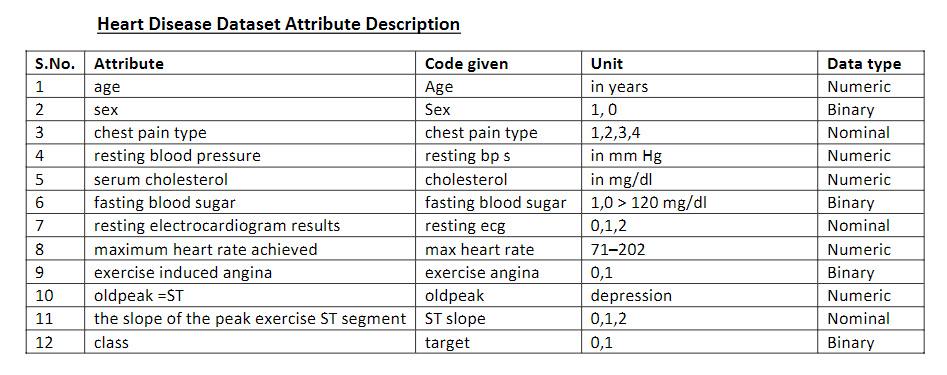

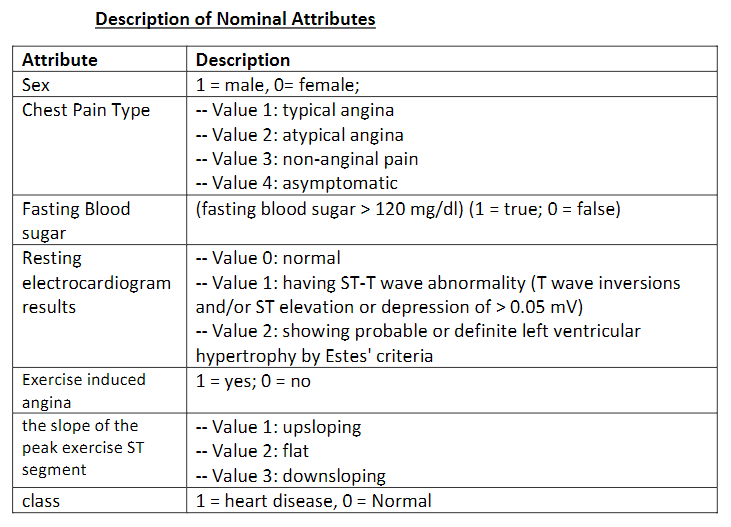


In [46]:
#Traigo el dataset ubicado en la carpeta raiz y lo estandarizo para despues alimentar la red con valores entre 0 y 1, lo que hará mas cómodo el entramiento de la misma.

import pandas as pd
import numpy as np

df = pd.read_csv("heart_statlog.csv") #Traigo el dataset utilizando pandas
#df.describe()
columnas = ["age", "sex", "chest pain type", "resting bp s", "cholesterol", "fasting blood sugar", "resting ecg", "max heart rate", "exercise angina", "oldpeak", "ST slope", "target"]
df[columnas] = df[columnas] / df[columnas].max() #Estandarizo cada columna diviendola por el valor máximo ya que no cuento con valores negativos
df.describe() #Hago un describe del dataframe obtenido normalizada
#df #Muestro algunos valores del dataframe normalizado para chequear


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,0.697665,0.763866,0.808193,0.660769,0.348862,0.213445,0.349160,0.691746,0.387395,0.148834,0.541457,0.528571
std,0.121535,0.424884,0.233870,0.091844,0.168193,0.409912,0.435179,0.126325,0.487360,0.175216,0.203486,0.499393
min,0.363636,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.297030,0.000000,-0.419355,0.000000,0.000000
25%,0.610390,1.000000,0.750000,0.600000,0.311774,0.000000,0.000000,0.599010,0.000000,0.000000,0.333333,0.000000
50%,0.701299,1.000000,1.000000,0.650000,0.379768,0.000000,0.000000,0.695545,0.000000,0.096774,0.666667,1.000000
75%,0.779221,1.000000,1.000000,0.700000,0.447347,0.000000,1.000000,0.792079,1.000000,0.258065,0.666667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


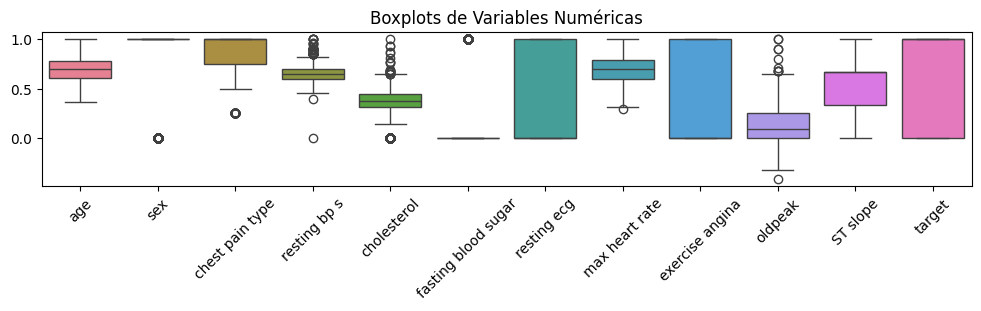

In [48]:
import numpy as np
import seaborn as sns               #Representan los valores atípicos automáticamente en un boxplot con Seaborn y Matplotlib
import matplotlib.pyplot as plt     

# Se seleccionan solo las columnas numéricas para el análisis de valores atípicos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear boxplots para cada variable numérica 
#El boxplot me permite visualizar la dispersión, la mediana y la presencia de valores atípicos
plt.figure(figsize=(12, 2))
sns.boxplot(data=df[numeric_columns])          #Los gráficos de caja(boxplot) muestran la mediana, los cuartiles y los valores atípicos de los datos
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

#La caja central para cada variable representa el rango intercuartílico (IQR), que va desde el primer cuartil (Q1) al tercer cuartil (Q3).
#La línea dentro de la caja representa la mediana (Q2) de los datos para esa variable 
#Los valores atipicos son los puntos individuales que se pueden observar en las variables.

[Text(0, 0, 'age'),
 Text(0, 1, 'sex'),
 Text(0, 2, 'chest pain type'),
 Text(0, 3, 'resting bp s'),
 Text(0, 4, 'cholesterol'),
 Text(0, 5, 'fasting blood sugar'),
 Text(0, 6, 'resting ecg'),
 Text(0, 7, 'max heart rate'),
 Text(0, 8, 'exercise angina'),
 Text(0, 9, 'oldpeak'),
 Text(0, 10, 'ST slope'),
 Text(0, 11, 'target')]

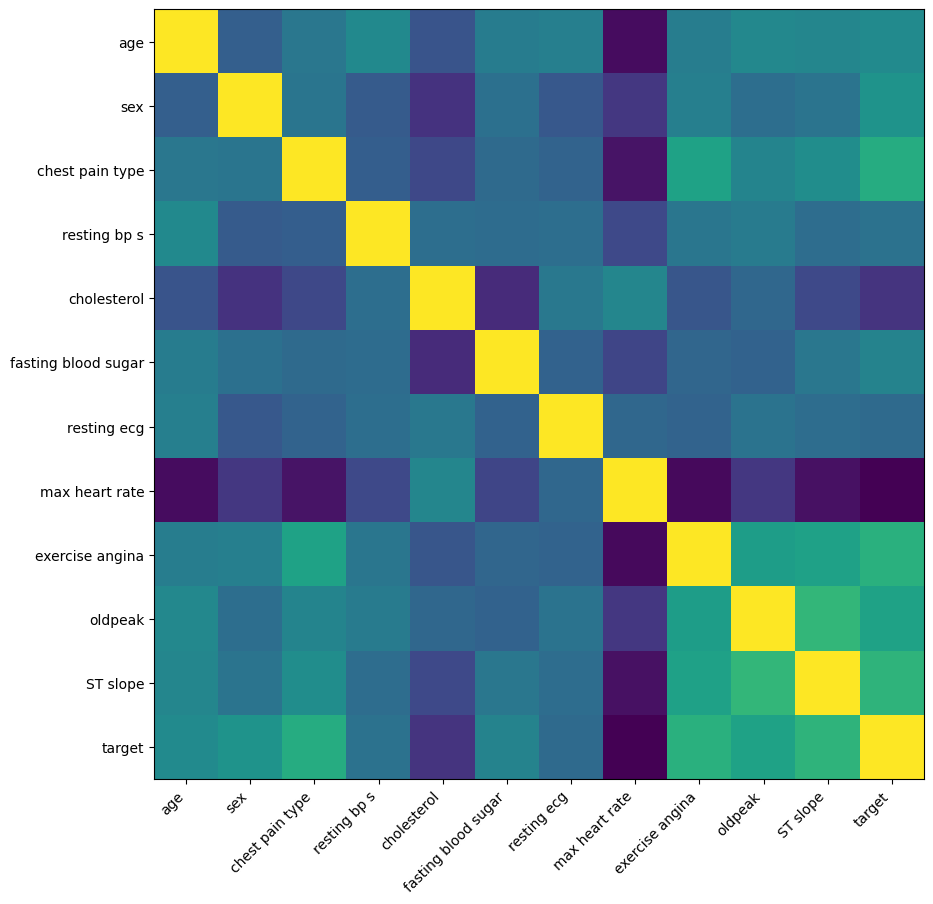

In [49]:
#Analizo la correlación de los datos

import matplotlib.pyplot as plt
labels = df.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((df.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(df.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(df.columns.to_list(), ha='right')


In [53]:
#Alimento y entreno mi red neuronal con el dataframe normalizado

import numpy as np
from sklearn.model_selection import train_test_split
columnasBien = ["age", "sex", "chest pain type", "resting bp s", "cholesterol", "fasting blood sugar", "resting ecg", "max heart rate", "exercise angina", "ST slope"]
all_inputs = df[columnasBien].values
all_outputs = df["target"].values

# Extraigo las columnas de entrada y de salida
#all_inputs = (df.iloc[:, 0:11].values)
#all_outputs = df.iloc[:, -1].values

# Divido en un conjunto de entrenamiento y uno de prueba - (2/3 - 1/3)
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1/3)

#Me guardo el tamaño de las entradas de entrenamiento
n = X_train.shape[0]

Decidí eliminar la columna de oldpeak ya que es la columna con mayor cantidad de valores atípicos y que menos correlación tiene de toda la base de datos, también, decidí no eliminar las columnas de colesterol y resting bp/s ya que no me parece que tengan tantos valores atipicos como para ser eliminadas y a parte, su correlación con el resultado final es muy fuerte

In [132]:
# Establezco la tasa de aprendizaje
L = 0.01 # 0.05

# Construyo una red neuronal con pesos y sesgos iniciados aleatoriamente

#np.random.seed(14) #seed utilizada para ajustar el mejor L y epochs

# 4 neuronas ocultas con 10 pesos cada una (un peso por cada entrada)
# 1 neurona de salida con 4 pesos (un peso por cada neurona oculta)
w_hidden = np.random.rand(4, 10) * 2 - 1
w_output = np.random.rand(1, 4) * 2 - 1

#--------------------------------------------------------------------
# w_hidden2 = np.random.rand(4, 4) 
# b_hidden2 = np.random.rand(4, 1)
# Ensayo de la red neuronal hecha con 2 capas ocultas de 4 neuronas
#--------------------------------------------------------------------

#1 sesgo para cada una de las 4 neuronas ocultas
#1 sesgo para la neurona de salida
b_hidden = np.random.rand(4, 1) * 2 - 1
b_output = np.random.rand(1, 1) * 2 - 1

# Funciones de activacion
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Ejecutar entradas a través de la red neuronal para obtener salidas predichas
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

test_predictions = forward_prop(X_test.transpose())[3] # Me interesa solo la capa de salida, A2 
test_comparisons = np.equal((test_predictions <= .5).flatten().astype(int), Y_test) # Comparo los resultados de A2 con las salidas del conjunto de prueba
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])

print("Precisión parcial de la red NO entrenada: ", accuracy) 

# Derivadas de las funciones de activación, importantes para realizar la retropropagación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# Devuelve pendientes para pesos y sesgos usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

#---------------------------------------------------------------------------------------------------------
# Backward propagation para una red hecha con 2 capas ocultas

""" def backward_prop(Z1, A1, Z2, A2, Z3, A3, X, Y):
    dC_dA3 = 2 * (A3 - Y)
    dA3_dZ3 = d_logistic(Z3)
    dZ3_dW3 = A2
    dZ3_dA2 = w_output
    dC_dZ3 = dC_dA3 * dA3_dZ3

    dC_dW3 = dC_dZ3 @ dZ3_dW3.T
    dC_dB3 = np.sum(dC_dZ3, axis=1, keepdims=True)

    dC_dA2 = dZ3_dA2.T @ dC_dZ3
    dA2_dZ2 = d_relu(Z2)
    dZ2_dW2 = A1
    dZ2_dA1 = w_hidden2
    dC_dZ2 = dC_dA2 * dA2_dZ2

    dC_dW2 = dC_dZ2 @ dZ2_dW2.T
    dC_dB2 = np.sum(dC_dZ2, axis=1, keepdims=True)

    dC_dA1 = dZ2_dA1.T @ dC_dZ2
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dC_dZ1 = dC_dA1 * dA1_dZ1

    dC_dW1 = dC_dZ1 @ dZ1_dW1.T
    dC_dB1 = np.sum(dC_dZ1, axis=1, keepdims=True)

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2, dC_dW3, dC_dB3 """
#---------------------------------------------------------------------------------------------------------
accuracy_train_l = []
accuracy_test_l = []

# Ejecuto descenso de gradiente
for i in range(30_000): 
    # Selecciono aleatoriamente uno de los datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # Paso datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2= forward_prop(X_sample)

    # Distribuyo error a través de la retropropagación y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    #--------------------------------------------------------------------------------
    # Traigo derivadas y actualizo pesos y sesgos para una red con 2 capas ocultas

    """dC_dW1, dC_dB1, dC_dW2, dC_dB2, dC_dW3, dC_dB3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, X_sample, Y_sample)"""

    """ w_hidden -= L * dC_dW1
    b_hidden -= L * dC_dB1
    w_hidden2 -= L * dC_dW2
    b_hidden2 -= L * dC_dB2
    w_output -= L * dC_dW3
    b_output -= L * dC_dB3 """
    #-------------------------------------------------------------------------------

    # Actualizo pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

    test_predictions = forward_prop(X_test.transpose())[3] # Me interesa solo la capa de salida, A2
    test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), np.array(Y_test >= 0).astype(int))
    accuracy_test = sum(test_comparisons.astype(int) / X_test.shape[0])
    accuracy_test_l.append(accuracy_test)

    test_predictions = forward_prop(X_train.transpose())[3] # Me interesa solo la capa de salida, A2
    test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), np.array(Y_train >= 0).astype(int))
    accuracy_train = sum(test_comparisons.astype(int) / X_train.shape[0])
    accuracy_train_l.append(accuracy_train)



# Funciones para interactuar y probar con nuevos conjuntos de síntomas introducidos manualmente
def predict_probability(age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, ST_slope):
    X = np.array([[age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, ST_slope]]).transpose()
    Z1, A1, Z2, A2 = forward_prop(X)
    print(A2)
    return A2

def predict_heart_disease(age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, ST_slope):
    output_values = predict_probability(age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, ST_slope)
    if output_values > .5:
        return "Posible enfermedad cardíaca detectada" 
    else:
        return "Posiblemente sano"    

Precisión parcial de la red NO entrenada:  0.5617128463476083


In [133]:
#Testeo la precisión de la red neuronal post-entrenamiento con datos de prueba y datos de entrenamiento

#ENTRENAMIENTO
test_predictions2 = forward_prop(X_train.transpose())[3] # Me interesa solo la capa de salida, A2
test_comparisons2 = np.equal((test_predictions2 >= .5).flatten().astype(int), Y_train)
accuracy = sum(test_comparisons2.astype(int) / X_train.shape[0])
print("Precisión de la red entrenada (Conjunto de entrenamiento):", accuracy) #Rango de precision con los parametros actuales (Promedio):

#PRUEBA
test_predictions = forward_prop(X_test.transpose())[3] # Me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("Precisión de la red entrenada (Conjunto de prueba):", accuracy) #Rango de precision con los parametros actuales (Promedio): 80-86

Precisión de la red entrenada (Conjunto de entrenamiento): 0.8221941992433852
Precisión de la red entrenada (Conjunto de prueba): 0.8337531486146074


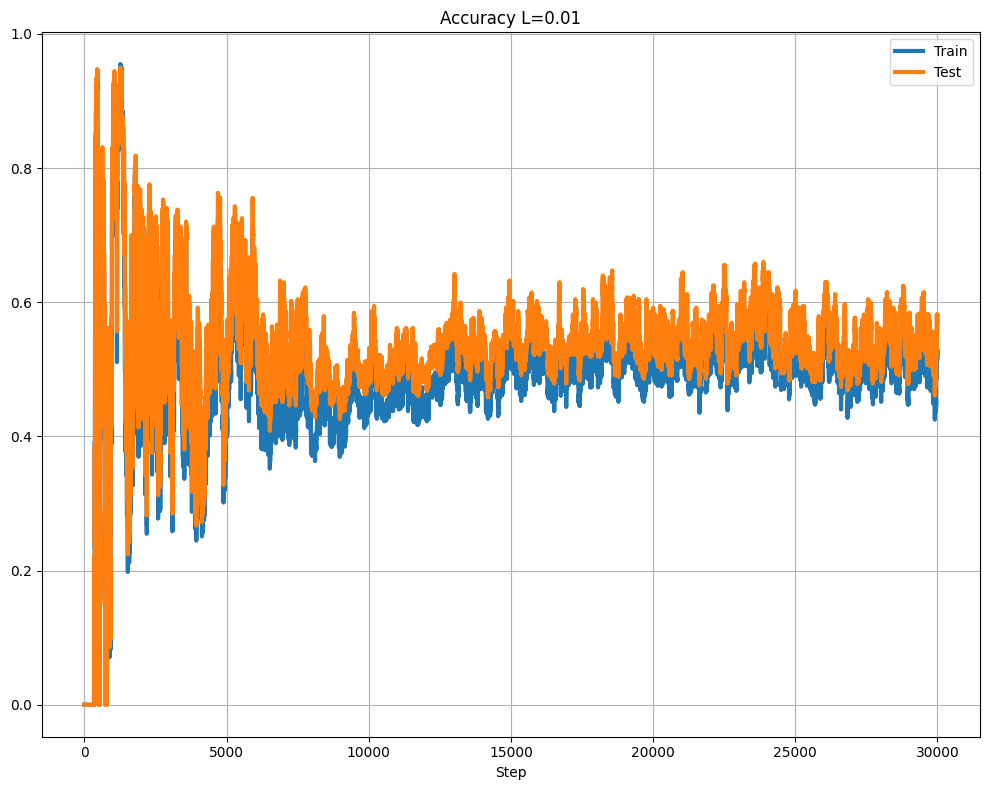

In [134]:
#grafico la accuracy en funcion de las iteraciones
import matplotlib.pyplot as plt

def graficar_accuracy(L, train_l, test_l):
    iters = len(test_l)
    fmt_train = {
        'color': 'tab:blue',
        'ls':'solid',
        'lw': 3
    }
    fmt_test = {
        'color': 'tab:orange',
        'ls':'solid',
        'lw': 3
    }

    fig, (ax) = plt.subplots(1, 1, figsize = (10,8))
    ax.plot(train_l, label='Train', **fmt_train)
    ax.plot(test_l, label='Test', **fmt_test)

    ax.grid(which='both')
    ax.legend()
    ax.set_title(f'Accuracy {L=}')
    ax.set_xlabel('Step')

    fig.tight_layout()
    plt.savefig(f'accuracy_{L=}_{iters=}.png')

graficar_accuracy(L, accuracy_train_l, accuracy_test_l)

In [135]:
#generalizo red en funcion para analizar graficamente como se comporta la red en base a Ls/iters distintas

def mi_red_neuronal(L, iters):
    #Alimento y entreno mi red neuronal con el dataframe normalizado

    import numpy as np
    from sklearn.model_selection import train_test_split

    # Extraigo las columnas de entrada y de salida
    all_inputs = (df[columnasBien].values)
    all_outputs = df["target"].values

    # Divido en un conjunto de entrenamiento y uno de prueba - (2/3 - 1/3)
    X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1/3)

    #Me guardo el tamaño de las entradas de entrenamiento
    n = X_train.shape[0]

    # Establezco la tasa de aprendizaje
    #L = 0.01 

    # Construyo una red neuronal con pesos y sesgos iniciados aleatoriamente

    np.random.seed(14) #seed utilizada para ajustar el mejor L y epochs

    # 4 neuronas ocultas con 11 pesos cada una (un peso por cada entrada)
    # 1 neurona de salida con 4 pesos (un peso por cada neurona oculta)
    w_hidden = np.random.rand(4, 10) * 2 - 1
    w_output = np.random.rand(1, 4) * 2 - 1

    #--------------------------------------------------------------------
    # w_hidden2 = np.random.rand(4, 4) 
    # b_hidden2 = np.random.rand(4, 1)
    # Ensayo de la red neuronal hecha con 2 capas ocultas de 4 neuronas
    #--------------------------------------------------------------------

    #1 sesgo para cada una de las 4 neuronas ocultas
    #1 sesgo para la neurona de salida
    b_hidden = np.random.rand(4, 1) * 2 - 1
    b_output = np.random.rand(1, 1) * 2 - 1

    # Funciones de activacion
    relu = lambda x: np.maximum(x, 0)
    logistic = lambda x: 1 / (1 + np.exp(-x))

    # Ejecutar entradas a través de la red neuronal para obtener salidas predichas
    def forward_prop(X):
        Z1 = w_hidden @ X + b_hidden
        A1 = relu(Z1)
        Z2 = w_output @ A1 + b_output
        A2 = logistic(Z2)
        return Z1, A1, Z2, A2

    test_predictions = forward_prop(X_test.transpose())[3] # Me interesa solo la capa de salida, A2 
    test_comparisons = np.equal((test_predictions <= .5).flatten().astype(int), Y_test) # Comparo los resultados de A2 con las salidas del conjunto de prueba
    accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])

    print("Precisión parcial de la red NO entrenada: ", accuracy) 

    # Derivadas de las funciones de activación, importantes para realizar la retropropagación
    d_relu = lambda x: x > 0
    d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

    # Devuelve pendientes para pesos y sesgos usando la regla de la cadena
    def backward_prop(Z1, A1, Z2, A2, X, Y):
        dC_dA2 = 2 * A2 - 2 * Y
        dA2_dZ2 = d_logistic(Z2)
        dZ2_dA1 = w_output
        dZ2_dW2 = A1
        dZ2_dB2 = 1
        dA1_dZ1 = d_relu(Z1)
        dZ1_dW1 = X
        dZ1_dB1 = 1

        dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

        dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

        dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

        dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

        dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

        return dC_dW1, dC_dB1, dC_dW2, dC_dB2

    #---------------------------------------------------------------------------------------------------------
    # Backward propagation para una red hecha con 2 capas ocultas

    """ def backward_prop(Z1, A1, Z2, A2, Z3, A3, X, Y):
        dC_dA3 = 2 * (A3 - Y)
        dA3_dZ3 = d_logistic(Z3)
        dZ3_dW3 = A2
        dZ3_dA2 = w_output
        dC_dZ3 = dC_dA3 * dA3_dZ3

        dC_dW3 = dC_dZ3 @ dZ3_dW3.T
        dC_dB3 = np.sum(dC_dZ3, axis=1, keepdims=True)

        dC_dA2 = dZ3_dA2.T @ dC_dZ3
        dA2_dZ2 = d_relu(Z2)
        dZ2_dW2 = A1
        dZ2_dA1 = w_hidden2
        dC_dZ2 = dC_dA2 * dA2_dZ2

        dC_dW2 = dC_dZ2 @ dZ2_dW2.T
        dC_dB2 = np.sum(dC_dZ2, axis=1, keepdims=True)

        dC_dA1 = dZ2_dA1.T @ dC_dZ2
        dA1_dZ1 = d_relu(Z1)
        dZ1_dW1 = X
        dC_dZ1 = dC_dA1 * dA1_dZ1

        dC_dW1 = dC_dZ1 @ dZ1_dW1.T
        dC_dB1 = np.sum(dC_dZ1, axis=1, keepdims=True)

        return dC_dW1, dC_dB1, dC_dW2, dC_dB2, dC_dW3, dC_dB3 """
    #---------------------------------------------------------------------------------------------------------
    accuracy_train_l = []
    accuracy_test_l = []

    # Ejecuto descenso de gradiente
    for i in range(iters): 
        # Selecciono aleatoriamente uno de los datos de entrenamiento
        idx = np.random.choice(n, 1, replace=False)
        X_sample = X_train[idx].transpose()
        Y_sample = Y_train[idx]

        # Paso datos seleccionados aleatoriamente a través de la red neuronal
        Z1, A1, Z2, A2= forward_prop(X_sample)

        # Distribuyo error a través de la retropropagación y devolver pendientes para pesos y sesgos
        dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

        #--------------------------------------------------------------------------------
        # Traigo derivadas y actualizo pesos y sesgos para una red con 2 capas ocultas

        """dC_dW1, dC_dB1, dC_dW2, dC_dB2, dC_dW3, dC_dB3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, X_sample, Y_sample)"""

        """ w_hidden -= L * dC_dW1
        b_hidden -= L * dC_dB1
        w_hidden2 -= L * dC_dW2
        b_hidden2 -= L * dC_dB2
        w_output -= L * dC_dW3
        b_output -= L * dC_dB3 """
        #-------------------------------------------------------------------------------

        # Actualizo pesos y sesgos
        w_hidden -= L * dW1
        b_hidden -= L * dB1
        w_output -= L * dW2
        b_output -= L * dB2

        test_predictions = forward_prop(X_test.transpose())[3] # Me interesa solo la capa de salida, A2
        test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), np.array(Y_test >= 0).astype(int))
        accuracy_test = sum(test_comparisons.astype(int) / X_test.shape[0])
        accuracy_test_l.append(accuracy_test)

        test_predictions = forward_prop(X_train.transpose())[3] # Me interesa solo la capa de salida, A2
        test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), np.array(Y_train >= 0).astype(int))
        accuracy_train = sum(test_comparisons.astype(int) / X_train.shape[0])
        accuracy_train_l.append(accuracy_train)
    graficar_accuracy(L=L, train_l=accuracy_train_l, test_l=accuracy_test_l)

Precisión parcial de la red NO entrenada:  0.4710327455919413
Precisión parcial de la red NO entrenada:  0.44080604534005186
Precisión parcial de la red NO entrenada:  0.44080604534005186
Precisión parcial de la red NO entrenada:  0.44080604534005186
Precisión parcial de la red NO entrenada:  0.44080604534005186
Precisión parcial de la red NO entrenada:  0.4760705289672562
Precisión parcial de la red NO entrenada:  0.4760705289672562
Precisión parcial de la red NO entrenada:  0.4760705289672562
Precisión parcial de la red NO entrenada:  0.4760705289672562
Precisión parcial de la red NO entrenada:  0.45843828715365403
Precisión parcial de la red NO entrenada:  0.45843828715365403
Precisión parcial de la red NO entrenada:  0.45843828715365403


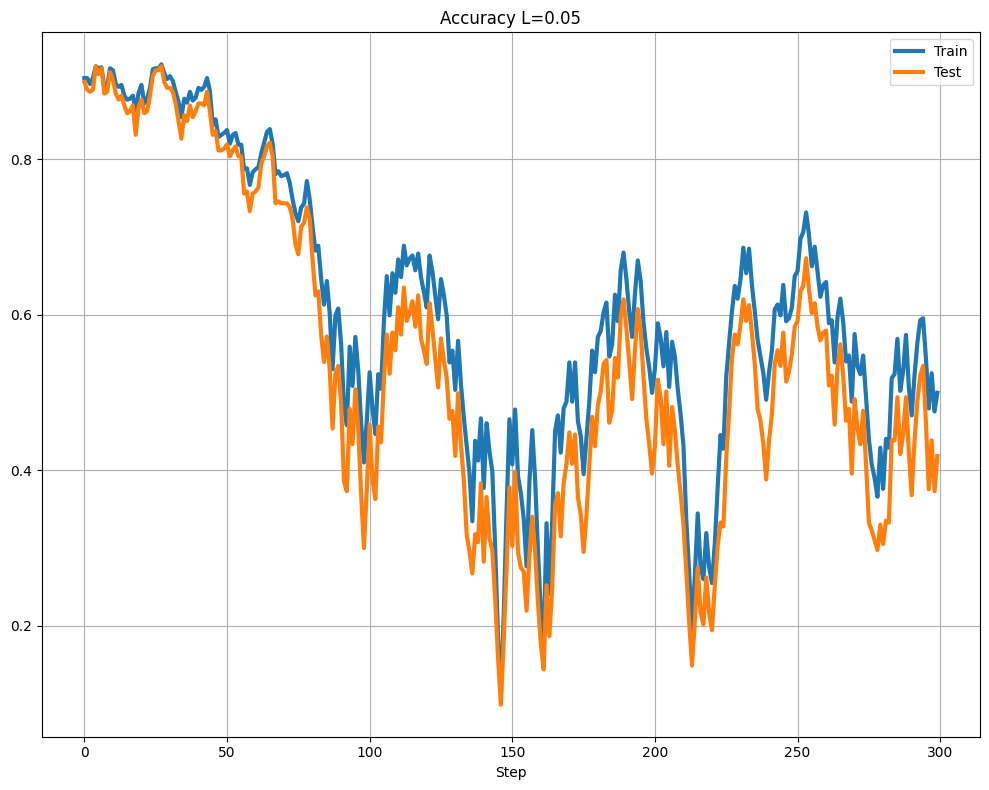

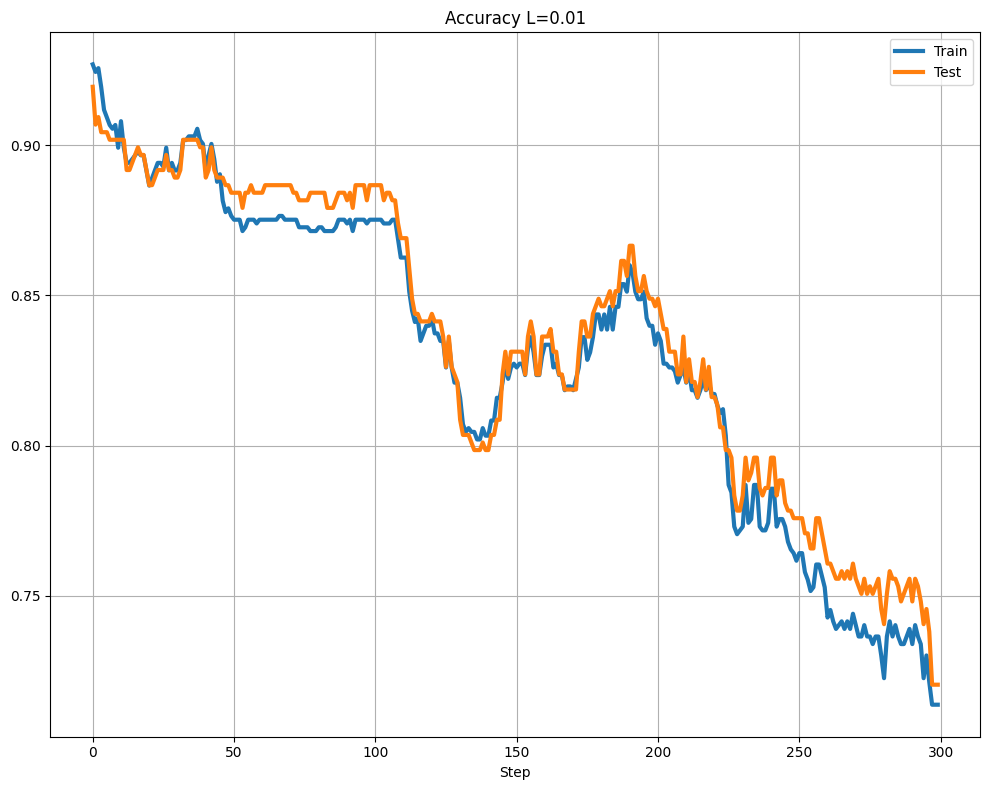

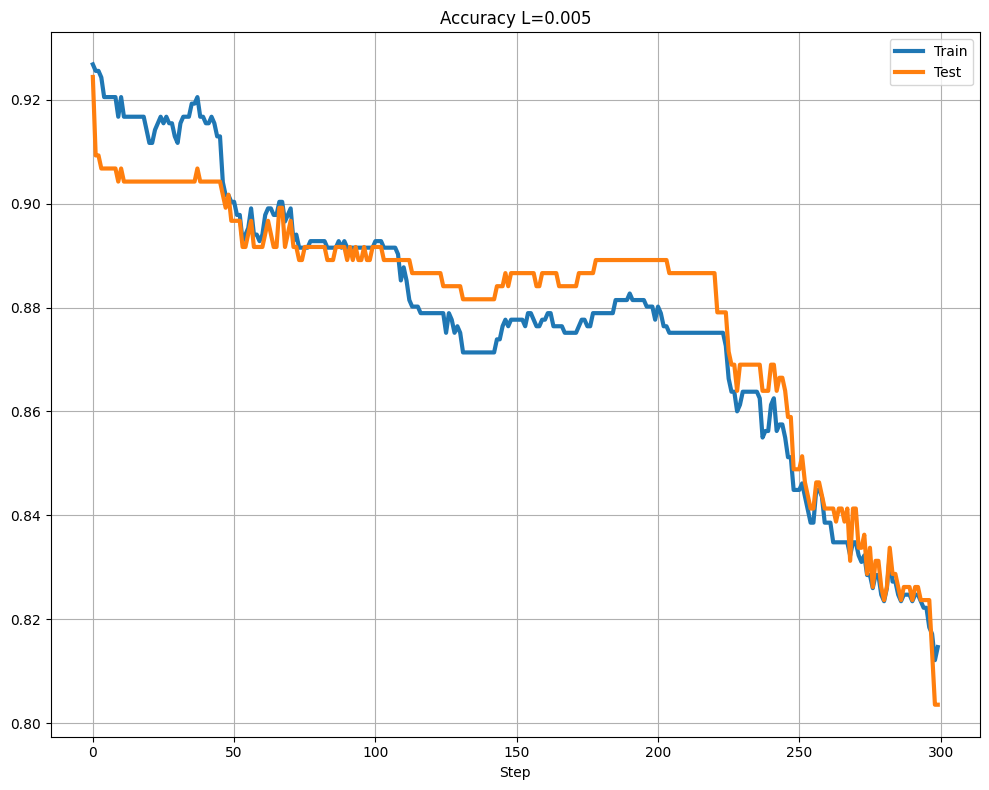

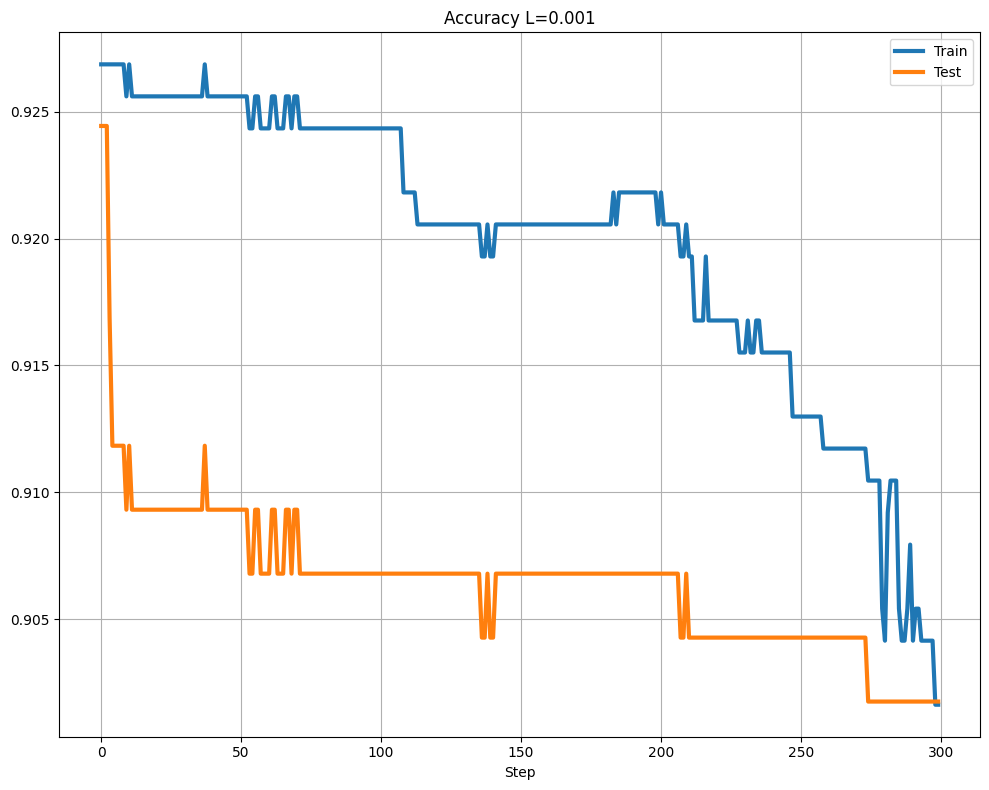

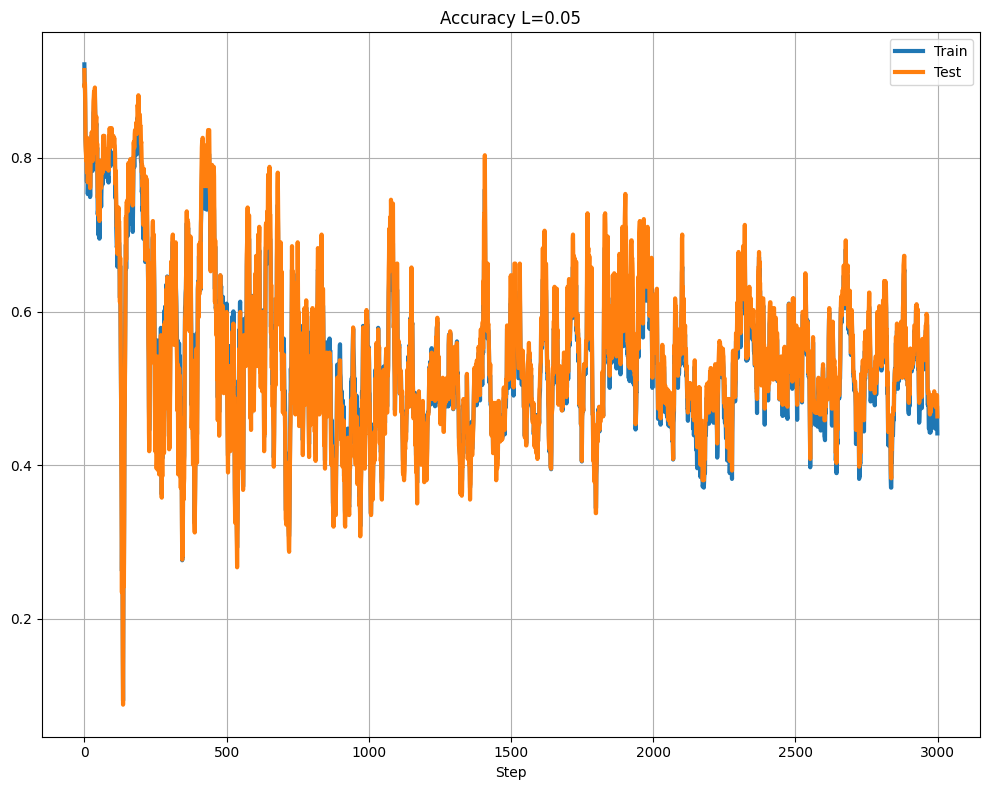

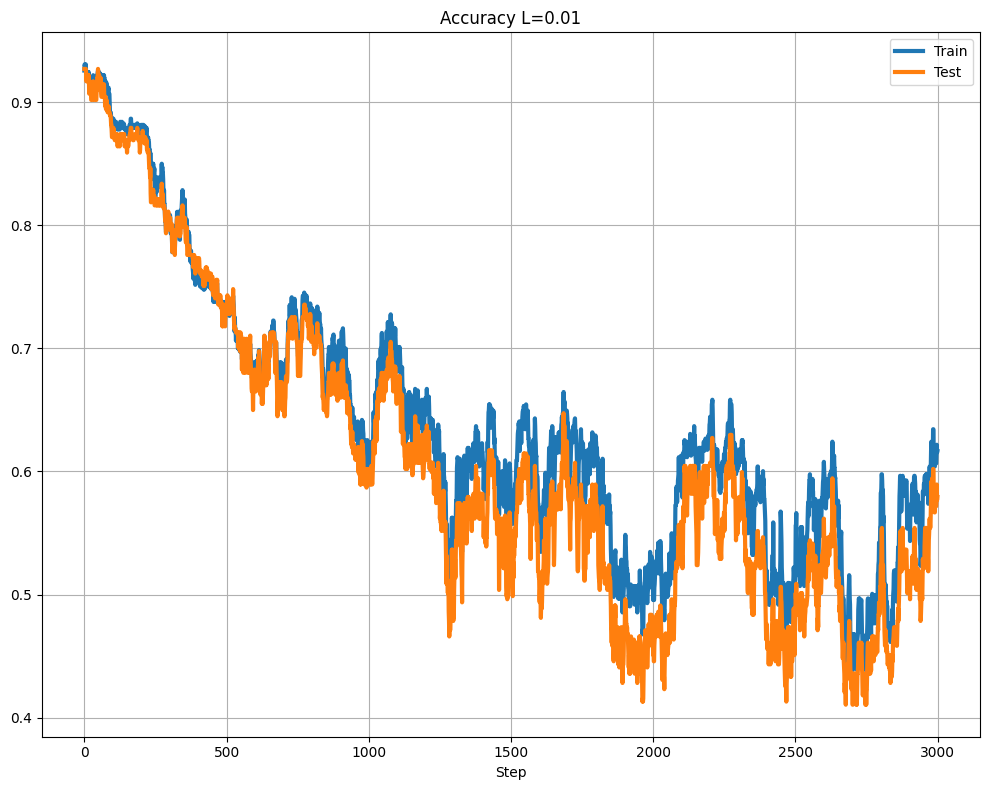

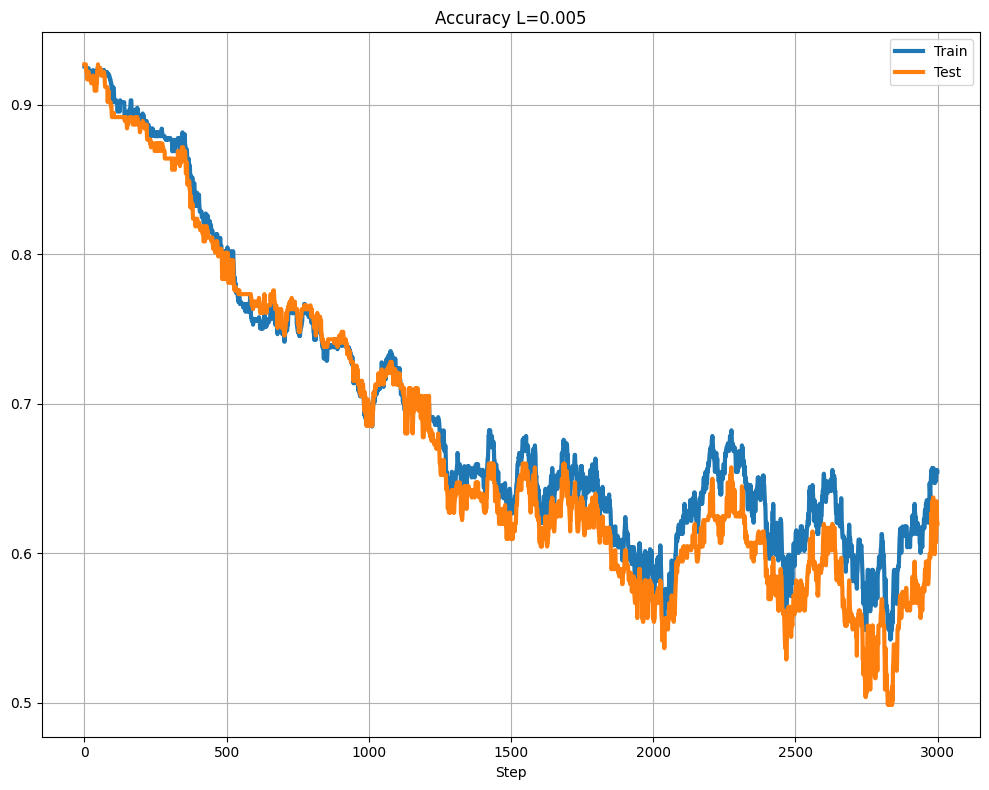

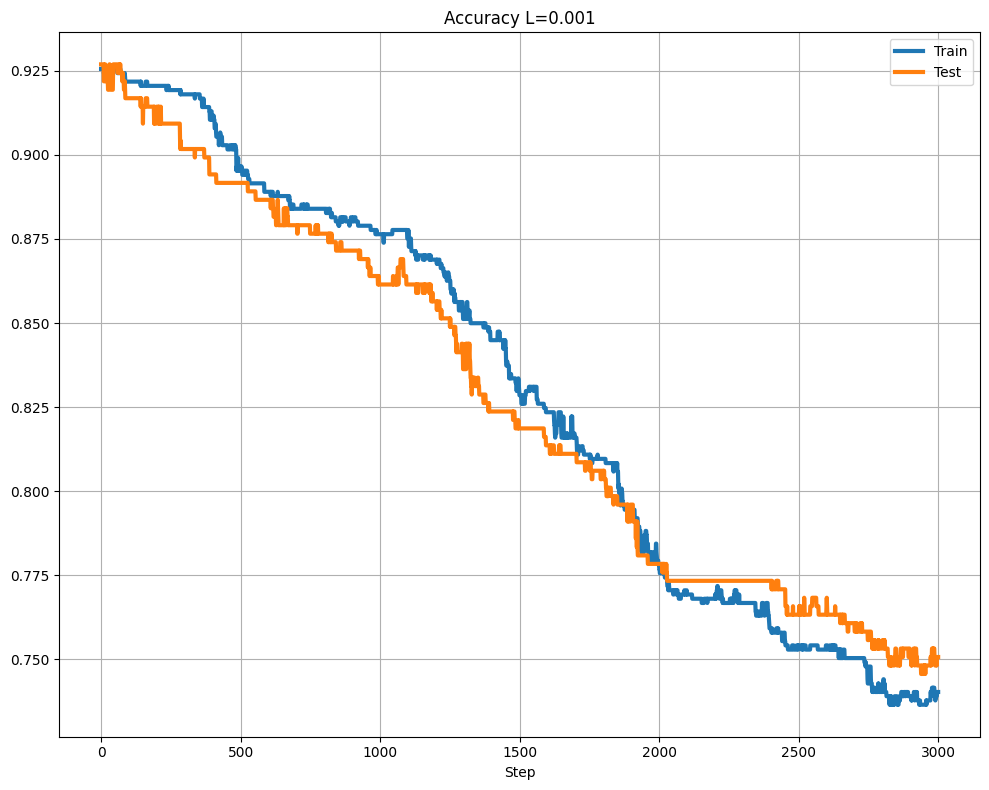

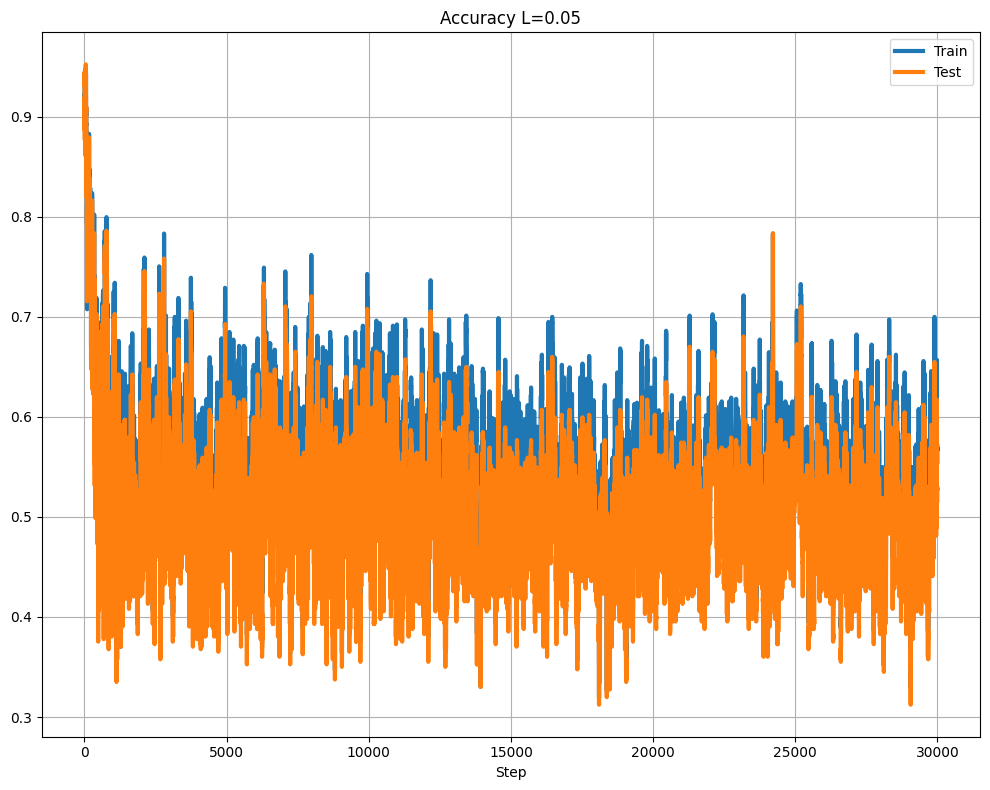

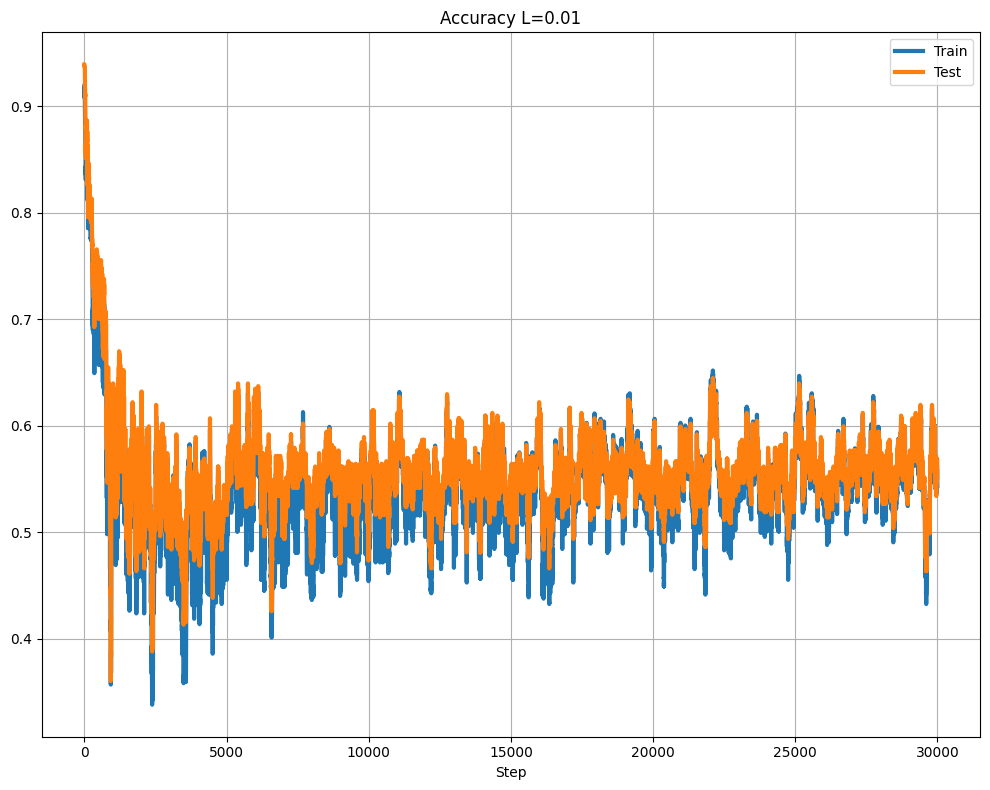

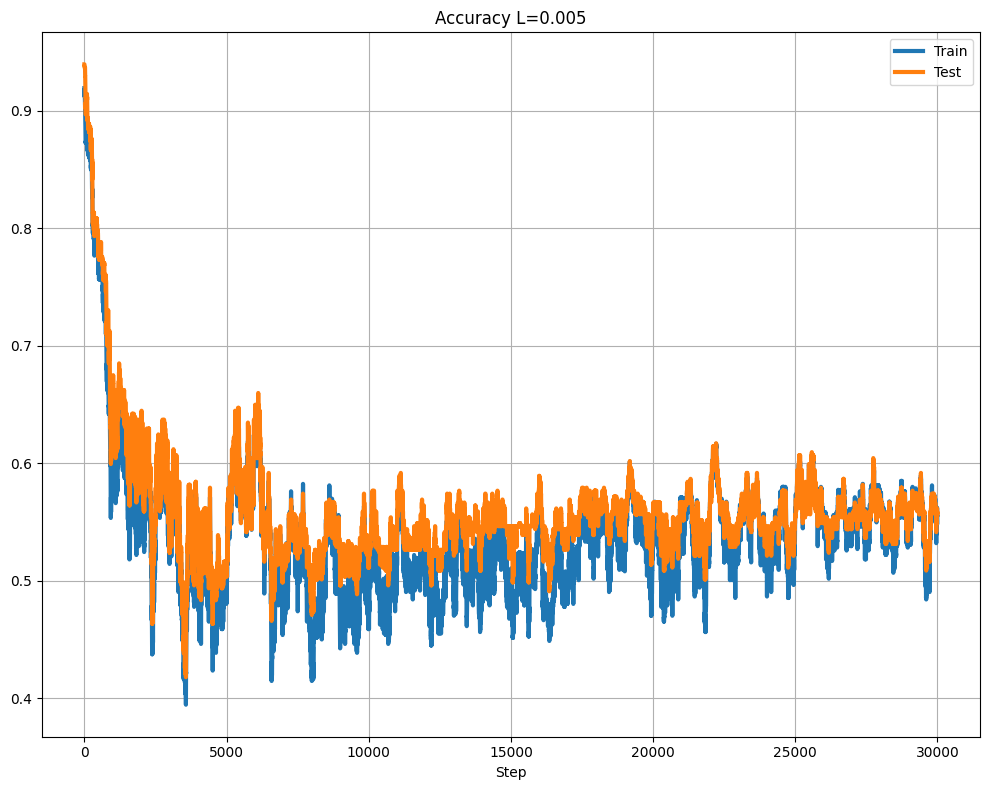

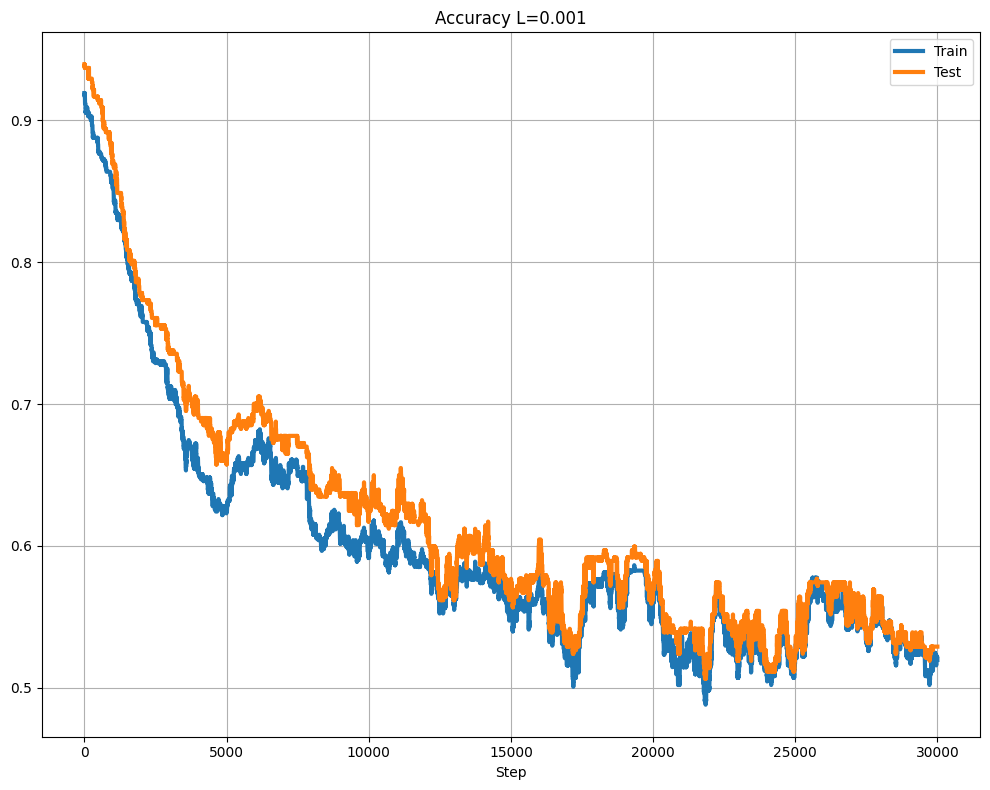

In [107]:
iters_l = [300, 3000, 30000]
L_l = [0.05, 0.01, 0.005, 0.001]
for iter in iters_l:
    for L in L_l:
        mi_red_neuronal(L=L, iters=iter)

In [129]:
# MISMA RED CON SCIKIT LEARN

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv("heart_statlog.csv")
columnas = ["age", "sex", "chest pain type", "resting bp s", "cholesterol", "fasting blood sugar", "resting ecg", "max heart rate", "exercise angina", "oldpeak", "ST slope", "target"]
df[columnas] = df[columnas] / df[columnas].max() #Normalizo por valores máximos

# Extraer variables de entrada (todas las filas, todas las columnas menos la última)
X = df[columnasBien].values

# Extraer columna de salida (todas las filas, última columna)
Y = df["target"].values

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd', #Funcion de activacion de salida, sgd/adam
                   hidden_layer_sizes=(4, ), #Neuronas de cada capa oculta
                   activation='relu', #Funcion de activacion oculta, relu
                   max_iter=30_000, #N de iteraciones 100_000, 30_000, 50_000, 70_000
                   learning_rate_init=.01) #L tasa de aprendizaje, 0.01, 0.05, 0.1

nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
# print(nn.coefs_)
# print(nn.intercepts_)

print("Precisión de la red entrenada (Conjunto de entrenamiento): %f" % nn.score(X_train, Y_train))
print("Precisión de la red entrenada (Conjunto de prueba): %f" % nn.score(X_test, Y_test))
# Precisión máxima utilizando scikit learn y ajustando parametros como L y epochs es de 87% para entrenamiento y 86% para prueba

Precisión de la red entrenada (Conjunto de entrenamiento): 0.828499
Precisión de la red entrenada (Conjunto de prueba): 0.838791


In [136]:
# Agarro 10 personas de la db para probar el funcionamiento de la red con los registros mas visibles (primeros y ultimos 5 del .csv)
pacientes = {
    # Primeros 5 de la db normalizada
    "Santiago": [0.519481,	1.0,	0.50,	0.70,	0.479270,	0.0,	0.0,	0.851485,	0.0,	0.333333],  #0 - Posiblemente sano
    "Lorenzo": [0.636364,	0.0,	0.75,	0.80,	0.298507,	0.0,	0.0,	0.772277,	0.0,	0.666667], 	#1 - Posible enfermedad cardíaca
    "Dante": [0.480519,	1.0,	0.50,	0.65,	0.469320,	0.0,	0.5,	0.485149,	0.0,		0.333333], #0 - Posiblemente sano
    "Bruma": [0.623377,	0.0,	1.00,	0.69,	0.354892,	0.0,	0.0,	0.534653,	1.0,		0.666667], #1 - Posible enfermedad cardíaca
    "Martina": [0.701299,	1.0,	0.75,	0.75,	0.323383,	0.0,	0.0,	0.603960,	0.0,		0.333333], #0 - Posiblemente sano
    # Ultimos 5 de la db normalizada
    "Ali": [0.584416,	1.0,	0.25,	0.55,	0.437811,	0.0,	0.0,	0.653465,	0.0,	0.666667], #1 - Posible enfermedad cardíaca
    "Ille": [0.883117,	1.0,	1.00,	0.72,	0.320066,	1.0,	0.0,	0.698020,	0.0,	0.666667], #1 - Posible enfermedad cardíaca
    "Luis": [0.740260,	1.0,	1.00,	0.65,	0.217247,	0.0,	0.0,	0.569307,	1.0,	0.666667], #1 - Posible enfermedad cardíaca
    "Josefina": [0.740260,	0.0,	0.50,	0.65,	0.391376,	0.0,	1.0,	0.861386,	0.0,	0.666667], #1 - Posible enfermedad cardíaca
    "Tomás": [0.493506,	1.0,	0.75,	0.69,	0.290216,	0.0,	0.0,	0.856436,	0.0,	0.333333], #0 - Posiblemente sano
}

In [137]:
for nombre, valorSintomas in pacientes.items():
    print('-------------------------------')
    print(nombre, valorSintomas)
    [age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, ST_slope] = valorSintomas
    print(predict_heart_disease(int(age), int(sex), int(chest_pain_type), int(resting_bps), int(cholesterol), int(fasting_blood_sugar), int(resting_ecg), int(max_heart_rate), int(exercise_angina), int(ST_slope)))

-------------------------------
Santiago [0.519481, 1.0, 0.5, 0.7, 0.47927, 0.0, 0.0, 0.851485, 0.0, 0.333333]
[[0.38527907]]
Posiblemente sano
-------------------------------
Lorenzo [0.636364, 0.0, 0.75, 0.8, 0.298507, 0.0, 0.0, 0.772277, 0.0, 0.666667]
[[0.03388481]]
Posiblemente sano
-------------------------------
Dante [0.480519, 1.0, 0.5, 0.65, 0.46932, 0.0, 0.5, 0.485149, 0.0, 0.333333]
[[0.38527907]]
Posiblemente sano
-------------------------------
Bruma [0.623377, 0.0, 1.0, 0.69, 0.354892, 0.0, 0.0, 0.534653, 1.0, 0.666667]
[[0.75066558]]
Posible enfermedad cardíaca detectada
-------------------------------
Martina [0.701299, 1.0, 0.75, 0.75, 0.323383, 0.0, 0.0, 0.60396, 0.0, 0.333333]
[[0.38527907]]
Posiblemente sano
-------------------------------
Ali [0.584416, 1.0, 0.25, 0.55, 0.437811, 0.0, 0.0, 0.653465, 0.0, 0.666667]
[[0.38527907]]
Posiblemente sano
-------------------------------
Ille [0.883117, 1.0, 1.0, 0.72, 0.320066, 1.0, 0.0, 0.69802, 0.0, 0.666667]
[[0.8652549

In [112]:
#Para probar individualmente - implementar funcion para normalizar post-ingreso de datos
"""while True:
    col_input = input("Predict heart disease. Input symptoms Age, Sex, Chest pain type, Resting bp/s, Cholesterol, Fasting blood sugar, Resting ec/g, Max heart rate, Excercise angina, Oldpeak, ST_slope: ")
    (age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, oldpeak, ST_slope) = col_input.split(",")
    print(col_input)"""
    #print(predict_heart_disease(int(age), int(sex), int(chest_pain_type), int(resting_bps), int(cholesterol), int(fasting_blood_sugar), int(resting_ecg), int(max_heart_rate), int(exercise_angina), int(oldpeak), int(ST_slope)))

'while True:\n    col_input = input("Predict heart disease. Input symptoms Age, Sex, Chest pain type, Resting bp/s, Cholesterol, Fasting blood sugar, Resting ec/g, Max heart rate, Excercise angina, Oldpeak, ST_slope: ")\n    (age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, oldpeak, ST_slope) = col_input.split(",")\n    print(col_input)'